## Prepare Data

In [1]:
import torch
import os
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

bundle = torchaudio.pipelines.WAV2VEC2_LARGE
model_extr = bundle.get_model().to(device)

main_path = '/home/wawa_/'

emotion_map = {'Neutre': 'neutral', 'Colère': 'angry', 'Joie': 'happy', 'Tristesse': 'sad', 'Peur': 'fear',
              'Dégoût': 'disgust', 'Surprise': 'surprise'}

1.12.1
0.12.1+cu113
cuda


# Generate features (run once)

In [2]:
# import os

# data_path = '/home/wawa_/CaFE/High resolution (192kHz)/'
# folders = ['Joie', 'Peur', 'Tristesse', 'Colère', 'Dégoût', 'Neutre', 'Surprise']
# audios = []
# labels = []
# file_paths = []
# for folder in folders:
#   if folder!='Neutre':
#     subfolders = ['Fort/', 'Faible/']
#   else:
#     subfolders = ['']
#   for subfolder in subfolders:
#     dir_path = data_path + folder + '/' + subfolder
#     for file in os.listdir(dir_path):
#         if 'aiff' not in file:
#             continue
#         name = file.split('.')[0]
#         file_path = dir_path + file
#         labels.append(folder)
#         wave, sr = torchaudio.load(file_path)
#         wave = wave.to(device)
#         if sr != bundle.sample_rate:
#             wave = torchaudio.functional.resample(wave, sr, bundle.sample_rate)
  
#         with torch.inference_mode():
#             feature, _ = model_extr.extract_features(wave)
#         feature = [f[0] for f in feature]
#         feature = torch.stack(feature)
#         save_path_folder = f'/home/wawa_/data/wav2vecbase/{folder}/{subfolder}'
#         os.makedirs(save_path_folder, exist_ok = True) 
#         save_path = f'/home/wawa_/data/wav2vecbase/{folder}/{subfolder}{name}.pt'
#         torch.save(feature, save_path)


# Generate Sessions (run once)

In [3]:
# data_path = main_path + 'CaFE/High resolution (192kHz)/'
# features_path = main_path + 'data/wav2vecbase/'

# feat_extension = '.pt'

# keep_strong_only = False

# folders = ['Joie', 'Peur', 'Tristesse', 'Colère', 'Dégoût', 'Neutre', 'Surprise']
# labels = []

# file_paths = []
# new_file_paths = []
# strengths = []

# for folder in folders:
#   if folder!='Neutre':
#     subfolders = ['Fort/', 'Faible/']
#   else:
#     subfolders = ['']
#   for subfolder in subfolders:
#     dir_path = data_path + folder + '/' + subfolder
#     dir_path_features = features_path + folder + '/' + subfolder
#     for file in os.listdir(dir_path):
#         if 'aiff' not in file:
#             continue
#         if keep_strong_only and subfolder == 'Faible/':
#             continue              
#         file_path = dir_path + file
#         new_file_path = dir_path_features + file.split('.')[0] + feat_extension
        
#         if subfolder == '':
#           strengths.append('Fort')
#         else:
#           strengths.append(subfolder.split('/')[0])

#         labels.append(emotion_map[folder])
#         file_paths.append(file_path)
#         new_file_paths.append(new_file_path)


In [4]:
# import random
# from tqdm import tqdm
# import pandas as pd

# def shuffle_lists(list1, list2, list3, list4):
#     combined = list(zip(list1, list2, list3, list4))
#     random.shuffle(combined)
#     return zip(*combined)

# file_paths, new_file_paths, labels, strengths = shuffle_lists(file_paths, new_file_paths, labels, strengths)

# sessions = []
# file_names = []

# equal_parts = (len(file_paths)-1)//5 # for equally split the file_paths into 5 parts
# count = 0
# for i in tqdm(range(len(file_paths))):
#     file_path = file_paths[i]
#     if "aiff" not in file_path:
#         continue
#     file_name = file_path.split('/')[-1]
#     file_names.append(file_name)
#     # assign session to it
#     part = (count//equal_parts)%6 + 1
#     if part == 6:
#         part = 5
#     sessions.append(part)
#     count += 1

# file = pd.DataFrame({'path':file_paths, 'feat_path': new_file_paths, 'name': file_names, 'emotion': labels, 'strength': strengths, 'session': sessions})
# dataframe_path = main_path + 'session_entries.csv'
# file.to_csv(dataframe_path)

## Load Data

In [5]:
import pandas as pd

# Get the entries with assigned session
dataframe_path = main_path + 'session_entries.csv'
file = pd.read_csv(dataframe_path)[['path', 'feat_path', 'name', 'emotion', 'strength', 'session']]
file = file[file['strength'] == 'Fort']


# #### If on low_res data:
# def fix_path(path):
#     path2 = path.split('/')
#     if path2[-1][3]=='N':
#         path2[-1] = path2[-1][:5] + '1-' + path2[-1][5:]
#     return '/'.join(path2)

# def fix_name(name):
#     if name[3]=='N':
#         return name[:5] + '1-' + name[5:]
#     else:
#         return name

# file['path'] = file['path'].map(fix_path)
# file['feat_path'] = file['feat_path'].map(fix_path)
# file['name'] = file['name'].map(fix_name)

file.head()

,path,feat_path,name,emotion,strength,session
0,/home/wawa_/CaFE/High resolution (192kHz)/Dégo...,/home/wawa_/data/wav2vecbase/Dégoût/Fort/03-D-...,03-D-2-2.aiff,disgust,Fort,1
1,/home/wawa_/CaFE/High resolution (192kHz)/Neut...,/home/wawa_/data/wav2vecbase/Neutre/01-N-3.pt,01-N-3.aiff,neutral,Fort,1
2,/home/wawa_/CaFE/High resolution (192kHz)/Tris...,/home/wawa_/data/wav2vecbase/Tristesse/Fort/02...,02-T-2-6.aiff,sad,Fort,1
4,/home/wawa_/CaFE/High resolution (192kHz)/Surp...,/home/wawa_/data/wav2vecbase/Surprise/Fort/08-...,08-S-2-6.aiff,surprise,Fort,1
5,/home/wawa_/CaFE/High resolution (192kHz)/Tris...,/home/wawa_/data/wav2vecbase/Tristesse/Fort/09...,09-T-2-5.aiff,sad,Fort,1


# Create Sessions and shuffle data

In [6]:
holdout = 1
model_name = 'Wav2Vec2Large' 

train = file[file['session'] != holdout]
test = file[file['session'] == holdout]

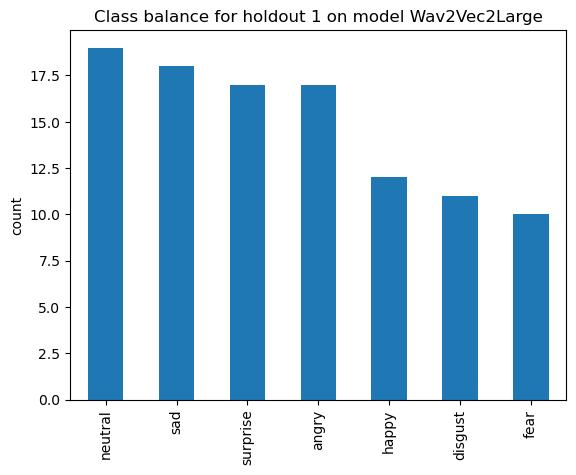

In [50]:
import matplotlib.pyplot as plt

file[file['session']== holdout]['emotion'].value_counts().plot(kind='bar')


os.makedirs(f'images/Session balances/{model_name}/', exist_ok = True) 
plt.title(f'Class balance for holdout {holdout} on model {model_name}')
plt.ylabel('count')
plt.savefig(f'images/Session balances/{model_name}/{model_name}_holdout{holdout}.jpg')
plt.show()

In [8]:
class MyDataSet(torch.utils.data.Dataset):
    def __init__(self, datas, labels, label_transform):
        super(MyDataSet).__init__()
        self.datas = datas
        self.labels = labels
        self.label_transform = label_transform
        
    def __getitem__(self, idx):
        audio = self.datas[idx]
        label = self.label_transform[self.labels[idx]]
        length = audio.size(1)
        return audio, length, label
    
    def __len__(self):
        return len(self.labels)

In [9]:
def collate_indic(data):
    audios, lengths, labels = zip(*data)
    max_len = max(lengths)
    n_ftrs = audios[0].size(2)
    n_dims = audios[0].size(0)
    features = torch.zeros((len(audios), n_dims, max_len, n_ftrs))
    labels = torch.tensor(labels).to(device)
    lengths = torch.tensor(lengths).to(device)

    for i in range(len(data)):
        j, k = audios[i].size(1), audios[i].size(2)
        features[i] = torch.cat([audios[i].to(device), torch.zeros((n_dims, max_len - j, k)).to(device)], dim=1).to(device)

    return features, lengths, labels

In [10]:
categories = ['neutral', 'angry', 'happy', 'sad', 'fear', 'disgust', 'surprise']
cate_dic = {}
for i, cate in enumerate(categories):
    cate_dic[cate] = i
cate_dic

{'neutral': 0,
 'angry': 1,
 'happy': 2,
 'sad': 3,
 'fear': 4,
 'disgust': 5,
 'surprise': 6}

## Train with 3CNN+LSTM

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class ICASSP3CNN(nn.Module):
    def __init__(self, vocab_size, dims = 12, embed_size=128, hidden_size=512, num_lstm_layers = 2, bidirectional = False, label_size=7):
        super().__init__()
        self.n_layers = num_lstm_layers 
        self.hidden = hidden_size
        self.bidirectional = bidirectional
        
        self.aggr = nn.Conv1d(in_channels=dims, out_channels=1, kernel_size=1)
        
        self.embed = nn.Linear(in_features = vocab_size, out_features = embed_size)

        self.cnn  = nn.Conv1d(embed_size, embed_size, kernel_size=3, padding=1)
        self.cnn2 = nn.Conv1d(embed_size, embed_size, kernel_size=5, padding=2)
        self.cnn3 = nn.Conv1d(embed_size, embed_size, kernel_size=7, padding=3)

        self.batchnorm = nn.BatchNorm1d(3 * embed_size)

        self.lstm = nn.LSTM(input_size = 3 * embed_size, 
                            hidden_size = hidden_size, 
                            num_layers = num_lstm_layers, 
                            bidirectional = bidirectional)

        self.linear = nn.Linear(in_features = 2 * hidden_size if bidirectional else hidden_size, 
                                out_features = label_size)


    def forward(self, x, lengths):
        """
        padded_x: (B,T) padded LongTensor
        """
        n, d, b, t = x.size(0), x.size(1), x.size(2), x.size(3)
        x = torch.flatten(x, start_dim=2)
        input = self.aggr(x)
        input = torch.reshape(input, (n, b, t))
        input = self.embed(input)

        batch_size = input.size(0)
        input = input.transpose(1,2)    # (B,T,H) -> (B,H,T)

        cnn_output = torch.cat([self.cnn(input), self.cnn2(input), self.cnn3(input)], dim=1)

        input = F.relu(self.batchnorm(cnn_output))

        input = input.transpose(1,2)

        pack_tensor = nn.utils.rnn.pack_padded_sequence(input, lengths, batch_first=True, enforce_sorted=False)
        _, (hn, cn) = self.lstm(pack_tensor)

        if self.bidirectional:
            h_n = hn.view(self.n_layers, 2, batch_size, self.hidden)
            h_n = torch.cat([ h_n[-1, 0,:], h_n[-1,1,:] ], dim = 1)
        else:
            h_n = hn[-1]

        logits = self.linear(h_n)

        return logits

### Model Traning on each layer 

In [12]:
from tqdm import tqdm
from torch.utils.data import DataLoader

traindata = []
for _, row in tqdm(train.iterrows()):
    traindata.append(torch.load(row['feat_path']).to(device))

400it [02:44,  2.43it/s]


In [13]:
train_dataset = MyDataSet(traindata, train['emotion'].tolist(), cate_dic)
trainloader_args = dict(batch_size=16, shuffle=True)
train_dataloader = DataLoader(train_dataset, **trainloader_args, 
                              collate_fn=collate_indic)

In [20]:
from tqdm import tqdm
from torchsummary import summary
import torch.optim as optim

model = ICASSP3CNN(1024, dims = 24)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
epochs = 50
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in tqdm(range(epochs)):
    train_loss = 0
    acc_cnt = 0
    err_cnt = 0
    batch_cnt = 0
    model.train()
    for batch, (x, length, y) in enumerate(train_dataloader):
        x = x.to(device)
        y = y.to(device)
        length = length.cpu()
        optimizer.zero_grad()
        logits = model(x, length)
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()
        train_loss += loss.cpu().item()

        #model outputs
        out_val, out_indices = torch.max(logits, dim=1)
        tar_indices = y

        for i in range(len(out_indices)):
            if out_indices[i] == tar_indices[i]:
                acc_cnt += 1
            else:
                err_cnt += 1
        batch_cnt += 1
    
    train_loss = train_loss/batch_cnt
    train_accuracy = acc_cnt/(acc_cnt+err_cnt)
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)
    
    print(f"epoch:{epoch+1}, train accu:{train_accuracy:.4f},", f"train loss:{train_loss:.2f}")

  2%|▏         | 1/50 [00:12<09:53, 12.11s/it]

epoch:1, train accu:0.3375, train loss:1.66


  4%|▍         | 2/50 [00:22<08:42, 10.88s/it]

epoch:2, train accu:0.5750, train loss:1.23


  6%|▌         | 3/50 [00:32<08:16, 10.56s/it]

epoch:3, train accu:0.7025, train loss:0.90


  8%|▊         | 4/50 [00:43<08:20, 10.88s/it]

epoch:4, train accu:0.7600, train loss:0.77


 10%|█         | 5/50 [00:53<07:54, 10.54s/it]

epoch:5, train accu:0.7850, train loss:0.67


 12%|█▏        | 6/50 [01:03<07:35, 10.35s/it]

epoch:6, train accu:0.8250, train loss:0.52


 14%|█▍        | 7/50 [01:13<07:22, 10.28s/it]

epoch:7, train accu:0.8975, train loss:0.34


 16%|█▌        | 8/50 [01:23<07:06, 10.15s/it]

epoch:8, train accu:0.9025, train loss:0.28


 18%|█▊        | 9/50 [01:34<06:59, 10.24s/it]

epoch:9, train accu:0.9250, train loss:0.24


 20%|██        | 10/50 [01:44<06:52, 10.31s/it]

epoch:10, train accu:0.9500, train loss:0.16


 22%|██▏       | 11/50 [01:54<06:34, 10.12s/it]

epoch:11, train accu:0.9425, train loss:0.22


 24%|██▍       | 12/50 [02:04<06:22, 10.07s/it]

epoch:12, train accu:0.9425, train loss:0.25


 26%|██▌       | 13/50 [02:14<06:10, 10.01s/it]

epoch:13, train accu:0.9250, train loss:0.35


 28%|██▊       | 14/50 [02:24<06:00, 10.00s/it]

epoch:14, train accu:0.9675, train loss:0.14


 30%|███       | 15/50 [02:34<05:53, 10.10s/it]

epoch:15, train accu:0.9675, train loss:0.11


 32%|███▏      | 16/50 [02:45<05:49, 10.29s/it]

epoch:16, train accu:0.9450, train loss:0.16


 34%|███▍      | 17/50 [02:54<05:34, 10.14s/it]

epoch:17, train accu:0.9775, train loss:0.10


 36%|███▌      | 18/50 [03:04<05:23, 10.09s/it]

epoch:18, train accu:0.9750, train loss:0.07


 38%|███▊      | 19/50 [03:14<05:08,  9.96s/it]

epoch:19, train accu:0.9800, train loss:0.08


 40%|████      | 20/50 [03:24<04:58,  9.95s/it]

epoch:20, train accu:0.9875, train loss:0.04


 42%|████▏     | 21/50 [03:34<04:53, 10.11s/it]

epoch:21, train accu:0.9900, train loss:0.03


 44%|████▍     | 22/50 [03:45<04:48, 10.29s/it]

epoch:22, train accu:0.9950, train loss:0.02


 46%|████▌     | 23/50 [03:55<04:34, 10.15s/it]

epoch:23, train accu:0.9975, train loss:0.01


 48%|████▊     | 24/50 [04:05<04:21, 10.06s/it]

epoch:24, train accu:0.9950, train loss:0.04


 50%|█████     | 25/50 [04:15<04:10, 10.02s/it]

epoch:25, train accu:0.9825, train loss:0.07


 52%|█████▏    | 26/50 [04:24<03:58,  9.93s/it]

epoch:26, train accu:0.9650, train loss:0.13


 54%|█████▍    | 27/50 [04:35<03:54, 10.19s/it]

epoch:27, train accu:0.9900, train loss:0.04


 56%|█████▌    | 28/50 [04:45<03:42, 10.13s/it]

epoch:28, train accu:0.9925, train loss:0.02


 58%|█████▊    | 29/50 [04:55<03:30, 10.01s/it]

epoch:29, train accu:0.9900, train loss:0.03


 60%|██████    | 30/50 [05:05<03:18,  9.93s/it]

epoch:30, train accu:0.9900, train loss:0.05


 62%|██████▏   | 31/50 [05:14<03:07,  9.89s/it]

epoch:31, train accu:0.9825, train loss:0.07


 64%|██████▍   | 32/50 [05:24<02:55,  9.78s/it]

epoch:32, train accu:0.9775, train loss:0.06


 66%|██████▌   | 33/50 [05:34<02:47,  9.88s/it]

epoch:33, train accu:0.9050, train loss:0.32


 68%|██████▊   | 34/50 [05:45<02:41, 10.10s/it]

epoch:34, train accu:0.9525, train loss:0.15


 70%|███████   | 35/50 [05:54<02:29,  9.96s/it]

epoch:35, train accu:0.9700, train loss:0.13


 72%|███████▏  | 36/50 [06:04<02:18,  9.87s/it]

epoch:36, train accu:0.9750, train loss:0.07


 74%|███████▍  | 37/50 [06:14<02:07,  9.84s/it]

epoch:37, train accu:0.9900, train loss:0.03


 76%|███████▌  | 38/50 [06:23<01:57,  9.78s/it]

epoch:38, train accu:0.9825, train loss:0.07


 78%|███████▊  | 39/50 [06:34<01:49,  9.93s/it]

epoch:39, train accu:0.9925, train loss:0.03


 80%|████████  | 40/50 [06:44<01:40, 10.03s/it]

epoch:40, train accu:0.9950, train loss:0.03


 82%|████████▏ | 41/50 [06:54<01:30, 10.01s/it]

epoch:41, train accu:0.9925, train loss:0.03


 84%|████████▍ | 42/50 [07:04<01:18,  9.87s/it]

epoch:42, train accu:0.9650, train loss:0.11


 86%|████████▌ | 43/50 [07:13<01:08,  9.86s/it]

epoch:43, train accu:0.9800, train loss:0.07


 88%|████████▊ | 44/50 [07:23<00:59,  9.84s/it]

epoch:44, train accu:0.9975, train loss:0.01


 90%|█████████ | 45/50 [07:34<00:50, 10.04s/it]

epoch:45, train accu:1.0000, train loss:0.00


 92%|█████████▏| 46/50 [07:44<00:40, 10.20s/it]

epoch:46, train accu:1.0000, train loss:0.00


 94%|█████████▍| 47/50 [07:54<00:30, 10.06s/it]

epoch:47, train accu:1.0000, train loss:0.00


 96%|█████████▌| 48/50 [08:04<00:20, 10.00s/it]

epoch:48, train accu:1.0000, train loss:0.00


 98%|█████████▊| 49/50 [08:13<00:09,  9.84s/it]

epoch:49, train accu:1.0000, train loss:0.00


100%|██████████| 50/50 [08:23<00:00, 10.07s/it]

epoch:50, train accu:1.0000, train loss:0.00


## Model Test

In [26]:
#Let's free memory, else we will overflow our 16GB Memory GPU
del traindata
del train_dataset
del trainloader_args
del train_dataloader

torch.cuda.empty_cache()

In [27]:
from tqdm import tqdm

testdata = []
for _, row in tqdm(test.iterrows()):
    testdata.append(torch.load(row['feat_path']).to(device))
    
test_dataset = MyDataSet(testdata, test['emotion'].tolist(), cate_dic)
testloader_args = dict(batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, **testloader_args, 
                             collate_fn=collate_indic)

104it [00:43,  2.38it/s]


In [29]:
test_loss = 0
acc_cnt = 0
err_cnt = 0
batch_cnt = 0
model.eval()

for x, lengths, y in test_dataloader:

    x = x.to(device)
    y = y.to(device)

    lengths = lengths.cpu()
    logits = model(x, lengths)
    loss = criterion(logits, y)
    test_loss += loss.cpu().item()

    out_val, out_indices = torch.max(logits, dim=1)
    tar_indices = y

    for i in range(len(out_indices)):
        if out_indices[i] == tar_indices[i]:
            acc_cnt += 1
        else:
            err_cnt += 1
    batch_cnt += 1

test_loss = test_loss/batch_cnt
test_accuracy = acc_cnt/(acc_cnt+err_cnt)
print(f'test accuracy: {test_accuracy}')

test accuracy: 0.7980769230769231


Got 83 / 104 with accuracy 79.81
Confusion matrix for Wav2Vec 2.0:


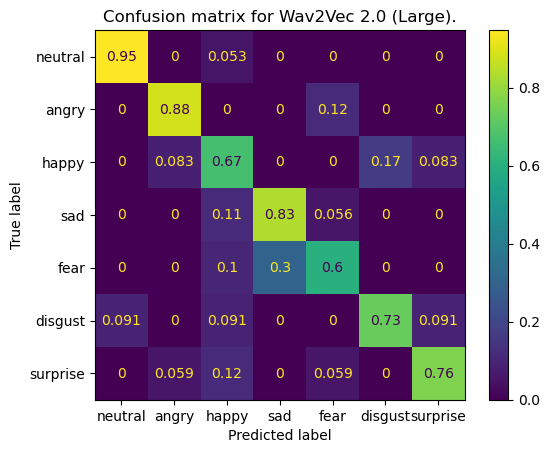

In [49]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    y_preds_list = []
    y_list = []
    
    with torch.no_grad():
        for batch, (x, length, y) in enumerate(loader):
            x = x.to(device=device)
            y = y.to(device=device)
            y_list.extend(y.tolist())
            length = length.to('cpu')
            
            scores = model(x, length)
            _, predictions = scores.max(1)
            y_preds_list.extend(predictions.tolist())
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)
        
        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}') 
    
    model.train()
    return y_preds_list, y_list, round(float(num_correct)/float(num_samples)*100, 1)
    
y_preds_list, y_list, accur = check_accuracy(test_dataloader, model)

print(f'Confusion matrix for Wav2Vec 2.0:')
disp = ConfusionMatrixDisplay(confusion_matrix(y_list, y_preds_list, normalize='true'), display_labels=['neutral', 'angry', 'happy', 'sad', 'fear', 'disgust', 'surprise'])

disp.plot()
plt.title(f'Confusion matrix for Wav2Vec 2.0 (Large).')


os.makedirs(f'images/Confusion Matrices/{model_name}/', exist_ok = True) 


plt.savefig(f'images/Confusion Matrices/{model_name}/{model_name}_CM_holdout{holdout}.png')
plt.show()

In [30]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

aggr.weight tensor([[[-0.1034],
         [ 0.1640],
         [ 0.0204],
         [ 0.0281],
         [-0.1704],
         [ 0.0952],
         [-0.1967],
         [ 0.1936],
         [-0.0717],
         [ 0.2025],
         [-0.1040],
         [ 0.0771],
         [-0.1338],
         [-0.0394],
         [-0.0678],
         [-0.1130],
         [ 0.1775],
         [-0.2558],
         [ 0.2126],
         [ 0.0928],
         [-0.0917],
         [ 0.0381],
         [-0.1356],
         [ 0.0391]]], device='cuda:0')
aggr.bias tensor([0.0614], device='cuda:0')
embed.weight tensor([[-0.0032,  0.0116, -0.0621,  ..., -0.0973,  0.0091, -0.0110],
        [-0.0298,  0.0317,  0.0605,  ...,  0.0358, -0.0440,  0.0498],
        [ 0.0134,  0.0221, -0.0573,  ...,  0.0324, -0.0467,  0.0047],
        ...,
        [-0.0264, -0.0056, -0.0006,  ..., -0.0149,  0.0540,  0.0698],
        [-0.0075,  0.0175, -0.0209,  ...,  0.0233, -0.0226,  0.0169],
        [ 0.0506, -0.0502, -0.0167,  ..., -0.0330, -0.0742, -0.0117]]

In [34]:
model_path = f'models/wav2vecbase/'

os.makedirs(model_path, exist_ok = True) 


torch.save({'epoch':epochs,
            'model_state_dict':model.state_dict(),
            'optimizer_state_dict':optimizer.state_dict()},
            model_path + f'holdout{holdout}.pth')